# **ANÁLISE EXPLORATÓRIA DOS DADOS**

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
%matplotlib inline

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/BrFlights2.csv', encoding= 'latin1' )

In [16]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [17]:
#Aqui vamos transpor a o dataset para termos uma visão geral das váriáveis
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2542479,2542480,2542481,2542482,2542483,2542484,2542485,2542486,2542487,2542488,2542489,2542490,2542491,2542492,2542493,2542494,2542495,2542496,2542497,2542498,2542499,2542500,2542501,2542502,2542503,2542504,2542505,2542506,2542507,2542508,2542509,2542510,2542511,2542512,2542513,2542514,2542515,2542516,2542517,2542518
Voos,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,...,UAL - 128,UAL - 128,UAL - 128,UAL - 128,UAL - 128,UAL - 128,UAL - 128,UAL - 128,UAL - 128,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129
Companhia.Aerea,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,...,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES
Codigo.Tipo.Linha,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,...,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional
Partida.Prevista,2016-01-30T08:58:00Z,2016-01-13T12:13:00Z,2016-01-29T12:1

In [18]:
#Aqui vemos os tipos que estão nossas colunas para fazermos algum tipo de mudança se necessário
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voos                  object 
 1   Companhia.Aerea       object 
 2   Codigo.Tipo.Linha     object 
 3   Partida.Prevista      object 
 4   Partida.Real          object 
 5   Chegada.Prevista      object 
 6   Chegada.Real          object 
 7   Situacao.Voo          object 
 8   Codigo.Justificativa  object 
 9   Aeroporto.Origem      object 
 10  Cidade.Origem         object 
 11  Estado.Origem         object 
 12  Pais.Origem           object 
 13  Aeroporto.Destino     object 
 14  Cidade.Destino        object 
 15  Estado.Destino        object 
 16  Pais.Destino          object 
 17  LongDest              float64
 18  LatDest               float64
 19  LongOrig              float64
 20  LatOrig               float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB



## Ajustes na estrutura do Dataframe


### 1º Ajuste nos nomes das colunas 

In [19]:
df.columns

Index(['Voos', 'Companhia.Aerea', 'Codigo.Tipo.Linha', 'Partida.Prevista',
       'Partida.Real', 'Chegada.Prevista', 'Chegada.Real', 'Situacao.Voo',
       'Codigo.Justificativa', 'Aeroporto.Origem', 'Cidade.Origem',
       'Estado.Origem', 'Pais.Origem', 'Aeroporto.Destino', 'Cidade.Destino',
       'Estado.Destino', 'Pais.Destino', 'LongDest', 'LatDest', 'LongOrig',
       'LatOrig'],
      dtype='object')

In [20]:
df.columns = ['voos', 'companhia', 'tipo_voo', 'data_partida_prev',
       'data_partida_real', 'data_chegada_prev', 'data_chegada_real',
        'situacao_voo','justificativa', 'aeroporto_origem', 'cidade_origem',
       'uf_origem', 'pais_origem', 'aeroporto_destino', 'cidade_destino',
       'uf_destino', 'pais_destino', 'long_destinot', 'lat_destino', 
       'long_origem', 'lat_origem']

In [21]:
df.head()

,voos,companhia,tipo_voo,data_partida_prev,data_partida_real,data_chegada_prev,data_chegada_real,situacao_voo,justificativa,aeroporto_origem,cidade_origem,uf_origem,pais_origem,aeroporto_destino,cidade_destino,uf_destino,pais_destino,long_destinot,lat_destino,long_origem,lat_origem
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


### Alterando o tipo das colunas que contêm datas

In [24]:
#Datas antes da formatação - 2016-01-30T08:58:00Z
#Forma desejada após formataçao - 2016-01-30 08:58:
df['data_partida_prev'][0]

'2016-01-30T08:58:00Z'

In [26]:
pd.to_datetime(df['data_partida_prev'][0])

Timestamp('2016-01-30 08:58:00+0000', tz='UTC')

In [31]:
pd.to_datetime(df['data_partida_prev'][0]).strftime('%Y-%m-%d %H:%M')

'2016-01-30 08:58'

In [33]:
#Como agora queremos formatar toda a coluna, nosso comando retorna um erro, pois a função strftime não aceita um objeto do tipo Series
#diante disso, teremos que fazer  uma converssão explicita com a propriedade dt do pd.to_datetime
pd.to_datetime(df['data_partida_prev']).strftime('%Y-%m-%d %H:%M')

AttributeError: ignored

In [37]:
df['data_partida_prev'] = pd.to_datetime(df['data_partida_prev']).dt.strftime('%Y-%m-%d %H:%M')

In [39]:
#Agora podemos reproduzir este comando para todas as nossas colunas que contém datas

#data_partida_real
df['data_partida_real'] = pd.to_datetime(df['data_partida_prev']).dt.strftime('%Y-%m-%d %H:%M')

#data_chegada_prev
df['data_chegada_prev'] = pd.to_datetime(df['data_partida_prev']).dt.strftime('%Y-%m-%d %H:%M')

#data_chegada_real
df['data_chegada_real'] = pd.to_datetime(df['data_partida_prev']).dt.strftime('%Y-%m-%d %H:%M')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   voos               object 
 1   companhia          object 
 2   tipo_voo           object 
 3   data_partida_prev  object 
 4   data_partida_real  object 
 5   data_chegada_prev  object 
 6   data_chegada_real  object 
 7   situacao_voo       object 
 8   justificativa      object 
 9   aeroporto_origem   object 
 10  cidade_origem      object 
 11  uf_origem          object 
 12  pais_origem        object 
 13  aeroporto_destino  object 
 14  cidade_destino     object 
 15  uf_destino         object 
 16  pais_destino       object 
 17  long_destinot      float64
 18  lat_destino        float64
 19  long_origem        float64
 20  lat_origem         float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


In [42]:
#Apesar de formatarmos os campos de datas, as colunas continuam com o data type
# como object, então para fazermos possíveis análises 
#com essas colunas temos que alterar o seu tipo para Datetime.

#data_partida_prev
df['data_partida_prev'] = df['data_partida_prev'].astype('datetime64[ns]')

#data_partida_real
df['data_partida_real'] = df['data_partida_real'].astype('datetime64[ns]')

#data_chegada_prev
df['data_chegada_prev'] = df['data_chegada_prev'].astype('datetime64[ns]')

#data_chegada_real
df['data_chegada_real'] = df['data_chegada_real'].astype('datetime64[ns]')


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   voos               object        
 1   companhia          object        
 2   tipo_voo           object        
 3   data_partida_prev  datetime64[ns]
 4   data_partida_real  datetime64[ns]
 5   data_chegada_prev  datetime64[ns]
 6   data_chegada_real  datetime64[ns]
 7   situacao_voo       object        
 8   justificativa      object        
 9   aeroporto_origem   object        
 10  cidade_origem      object        
 11  uf_origem          object        
 12  pais_origem        object        
 13  aeroporto_destino  object        
 14  cidade_destino     object        
 15  uf_destino         object        
 16  pais_destino       object        
 17  long_destinot      float64       
 18  lat_destino        float64       
 19  long_origem        float64       
 20  lat_origem         float

### Alterando a coluna 'situcao'

In [47]:
#Se olhamos os valores presentes na coluna 'situacao' podemos ver que há apenas 
#duas possibilidades, como podemos usar essa coluna como filtro, podemos 
#transformar essa coluna, em numérica.
df['situacao_voo'].unique()

array(['Realizado', 'Cancelado'], dtype=object)

In [50]:
#Aqui vamos vereificar se a coluna situacao ==  'Realizado' iremos atribuir
# o valor 1, caso contrário atribuiremos 0

df['situacao_voo'] = np.where(df['situacao_voo'] == 
                    'Realizado', 1 , 0).astype(int)

## Tratando colunas com valores nulos

In [54]:
#Aqui vemos que apenas a coluna de justificativa contém valores nulos, assim
#não atrapalhando nossa análise, uma vez que não precisaremos das justificativas
# para as análises que faremos.
df.isnull().sum()

voos                       0
companhia                  0
tipo_voo                   0
data_partida_prev          0
data_partida_real          0
data_chegada_prev          0
data_chegada_real          0
situacao_voo               0
justificativa        1510212
aeroporto_origem           0
cidade_origem              0
uf_origem                  0
pais_origem                0
aeroporto_destino          0
cidade_destino             0
uf_destino                 0
pais_destino               0
long_destinot              0
lat_destino                0
long_origem                0
lat_origem                 0
dtype: int64

## Explorando o Dataset

### 1º - Quantidade de voos por mês e ano

In [68]:
#Com este comando iremos obter um dataframe com os valores da quantidade de voos
# por cada ano 
df.groupby( df['data_partida_prev'].dt.year ).agg({'voos': np.count_nonzero}).reset_index()

,data_partida_prev,voos
0,2015,1082384
1,2016,937671
2,2017,522464


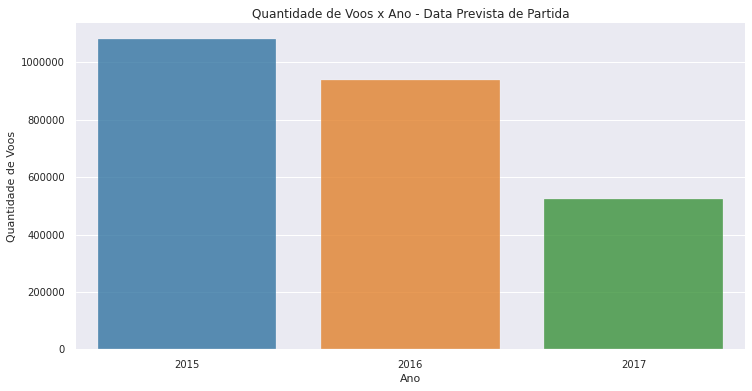

In [86]:
#Usando a biblioteca Seaborn nós iremos plotar um gráfico de barras com o
#dataframe que obtivemos

sns.set_style("darkgrid")

ax = sns.barplot(
    data = df.groupby(df['data_partida_prev'].dt.year).agg(
        {'voos': np.count_nonzero}).reset_index(),
    x = 'data_partida_prev',
    y = 'voos',
    alpha=.8
)

ax.figure.set_size_inches(12,6)
ax.set_title("Quantidade de Voos x Ano - Data Prevista de Partida")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de Voos")

plt.ticklabel_format(style='plain', axis='y')




In [88]:
#Agora nós queremos verificar a quantidade de voos por mês de cada ano
df.assign(ano=df['data_partida_prev'].dt.year, mes=df['data_partida_prev'].dt.month
         ).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index().head(5)

,ano,mes,voos
0,2015,1,93081
1,2015,2,84588
2,2015,3,92636
3,2015,4,88981
4,2015,5,90564


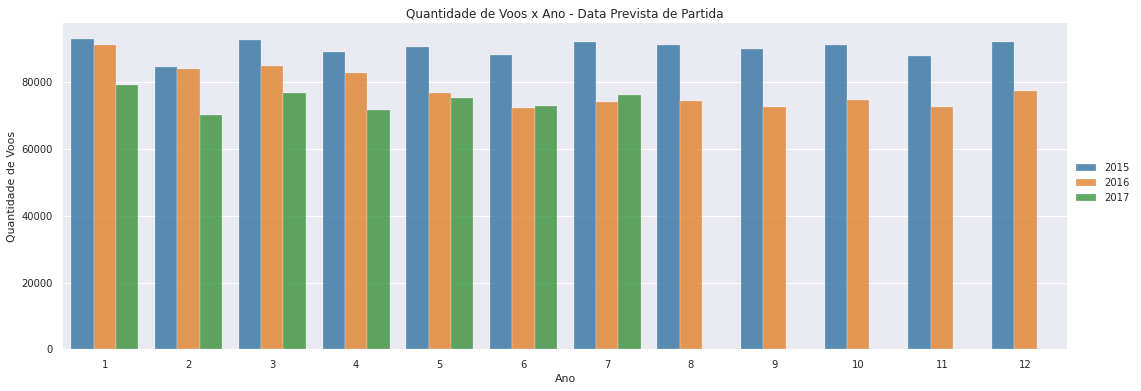

In [90]:
#Mais uma vês plotaremos um gráfico de barras, atrvés da biblioteca Seaborn

ax = sns.barplot(
    data = df.assign(ano=df['data_partida_prev'].dt.year, mes=df['data_partida_prev'].dt.month
         ).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index(),
    x = 'mes',
    hue = 'ano',
    y = 'voos',
    alpha=.8,
)

ax.figure.set_size_inches(18,6)
ax.set_title("Quantidade de Voos x Ano - Data Prevista de Partida")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de Voos")

plt.legend(bbox_to_anchor = (1.0, 0.6))

ax